# The Sparks Foundation

## Graduate Rotational Internship Program (GRIP) February2022 Batch

## Author : Saurabh Raj

## Data Science & Business Analytics

## Task-4 Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism'

## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset for analysis: 

In [2]:
data = pd.read_csv("C:\\Users\\saurabh\\Downloads\\globalterrorismdb_0718dist.csv",encoding='latin1' )

C:\downloads\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape

(181691, 135)

## Dropping out irrelevant columns: 

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"Day",'gname':'Group','country_txt':'Country',
                     'region_txt':'Region','provstate':'Province','city':'City','latitude':'Latitude',
                     'longitude':'Longitude','summary':'Summary','attacktype1_txt':'AttackType',
                     'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','nkill':'Killed',
                     'nwound':'Wounded'},inplace = True)

In [7]:
data = data[['Year','Month','Day','Country','Province','Region','City','Latitude','Longitude',"AttackType",
             'Killed','Wounded','target1','Summary','Group','Target_type','Weapon_type','motive']]
data.head()

,Year,Month,Day,Country,Province,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,target1,Summary,Group,Target_type,Weapon_type,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


## Properties of the dataset: 

In [8]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Province          421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
target1           636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
motive         131130
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Province     181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  target1      181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [10]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [11]:
data.nunique()

Year               47
Month              13
Day                32
Country           205
Province         2855
Region             12
City            36674
Latitude        48322
Longitude       48039
AttackType          9
Killed            205
Wounded           238
target1         86006
Summary        112492
Group            3537
Target_type        22
Weapon_type        12
motive          14490
dtype: int64

## Some results of the given dataset: 

In [12]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq


In [13]:
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])

Regions with Highest Terrorist Attacks: Middle East & North Africa


In [42]:
print('Maximum people killed in an attack are:',data['Killed'].max())

Maximum people killed in an attack are: 1570.0


In [15]:
print("Year with the most attacks:",data['Year'].value_counts().idxmax())

Year with the most attacks: 2014


In [16]:
print("Month with the most attacks:",data['Month'].value_counts().idxmax())

Month with the most attacks: 5


In [17]:
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Most Attack Types: Bombing/Explosion


In [44]:
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


## Visualising Correlation among dataset: 

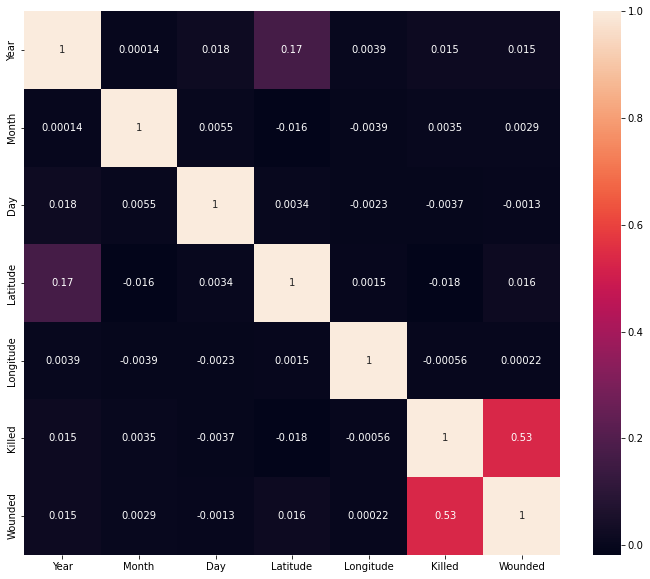

In [18]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot= True)
plt.show()

In [20]:
import warnings
warnings.filterwarnings("ignore")

## TIMELINE: Terrorist attacks by years: 

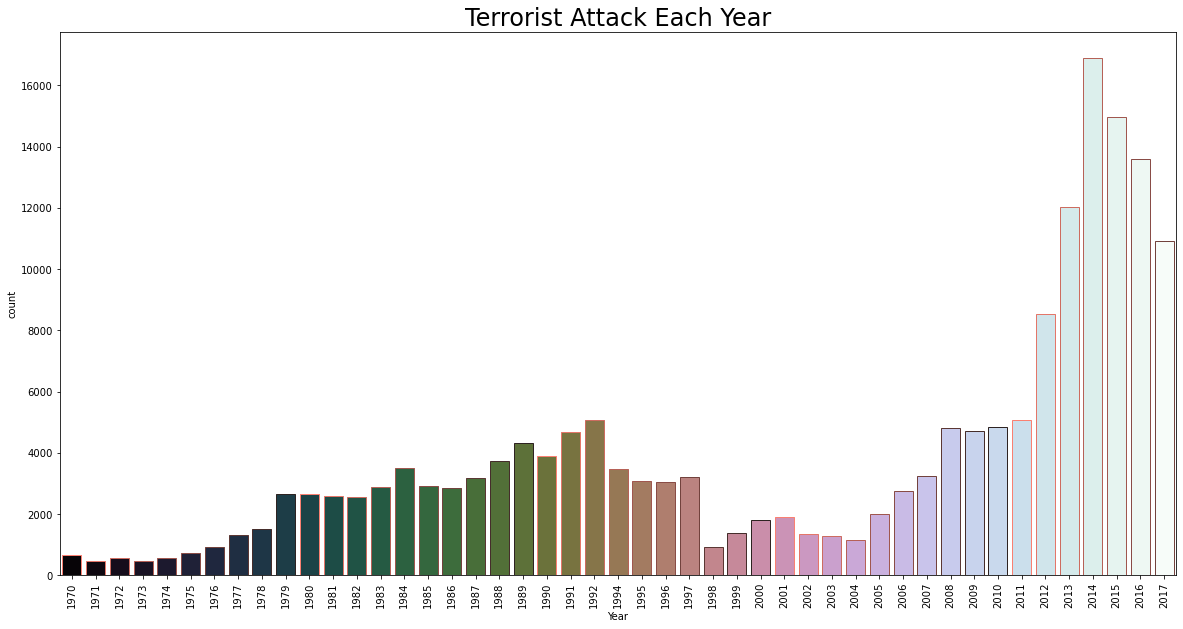

In [26]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=data,palette='cubehelix',edgecolor=sns.color_palette("dark:salmon_r", 10))
plt.xticks(rotation=90)     # degree of rotation of values on x axis.
plt.title('Terrorist Attack Each Year',fontsize=24)
plt.show()

## Top 10 countries with most terrorist attacks: 

In [24]:
data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

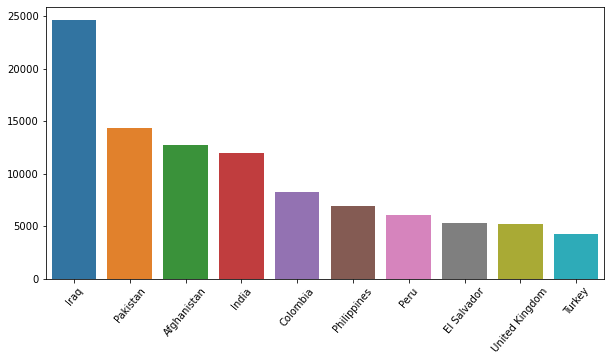

In [27]:
plt.figure(figsize=(10,5))
x = data['Country'].value_counts().values[:10]
y = data['Country'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=50)
plt.show()

## In the above graph we can see that Iraq is the most affected country in terrorism.

## Top 10 weapons used by Terrorists: 

In [29]:
data.Weapon_type.value_counts()[:10]

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: Weapon_type, dtype: int64

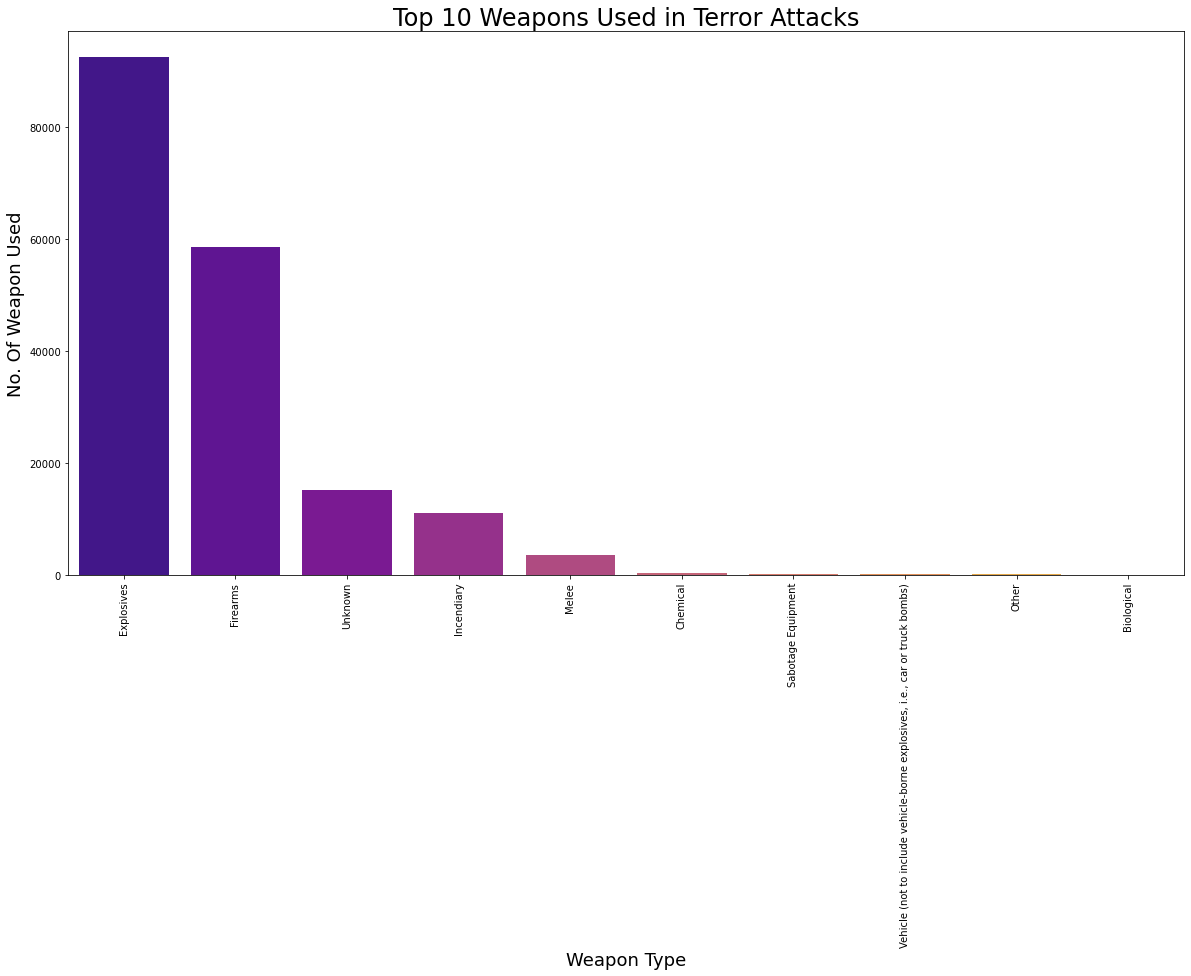

In [34]:
plt.subplots(figsize=(20,10))
sns.barplot(data['Weapon_type'].value_counts()[:10].index, data['Weapon_type'].value_counts()[:10].values, palette='plasma')
plt.title("Top 10 Weapons Used in Terror Attacks", fontsize=24)
plt.xlabel('Weapon Type', fontsize=18)
plt.ylabel('No. Of Weapon Used', fontsize=18)
plt.xticks(rotation = 90)
plt.show()

## From graph it is clear that explosives are the most used weapons in terrorist attacks.

## Top 10 cities in decreasing order of terrorist attacks: 

In [35]:
data.City.value_counts()[:10]

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: City, dtype: int64

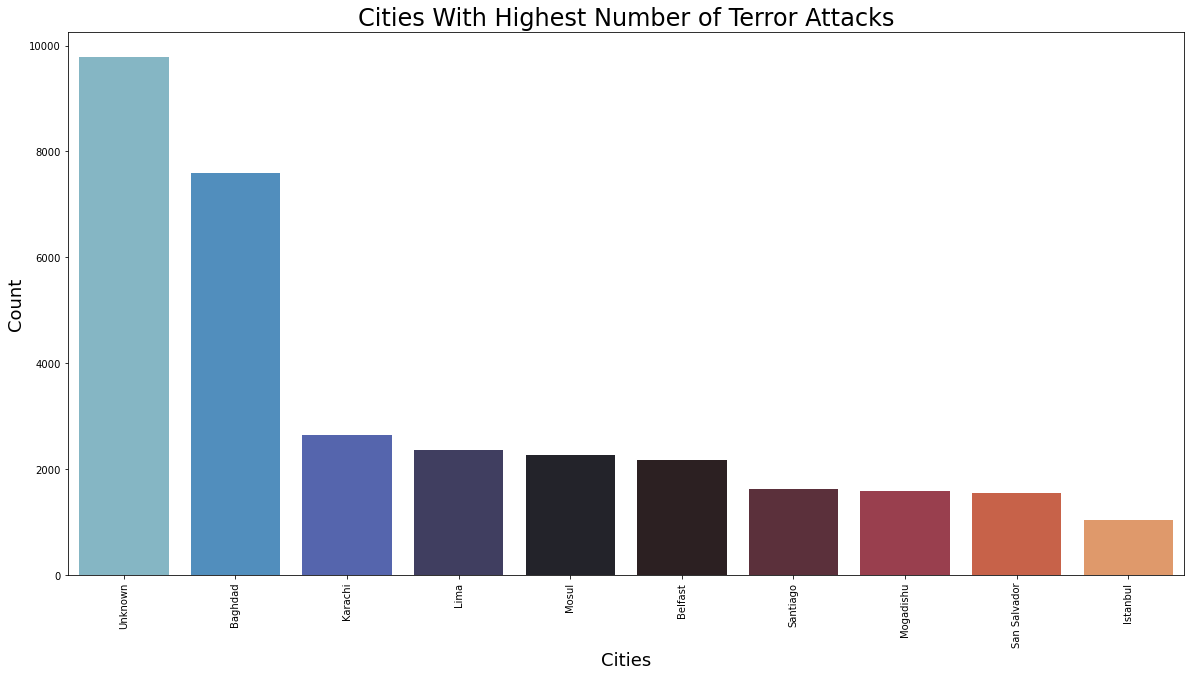

In [36]:
plt.subplots(figsize=(20,10))
sns.barplot(data['City'].value_counts()[:10].index,data['City'].value_counts()[:10].values,palette= 'icefire')
plt.title("Cities With Highest Number of Terror Attacks", fontsize=24)
plt.xlabel('Cities', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation = 90)
plt.show()

## From graph it is clear that Baghdad is the most affected city.

## Top 10 region with terrorist attacks: 

In [37]:
data['Region'].value_counts().head(10)

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Name: Region, dtype: int64

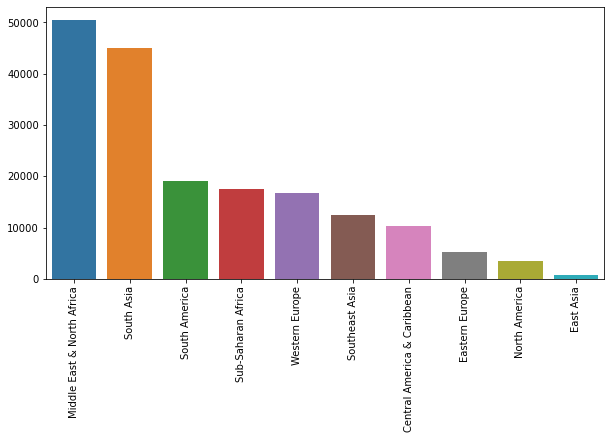

In [38]:
plt.figure(figsize=(10,5))
x = data['Region'].value_counts().values[:10]
y = data['Region'].value_counts().index[:10]
sns.barplot(y,x)
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that middle east and north africa experience the most number of attacks.

## TIMELINE: Terrorist attacks in different region by years: 

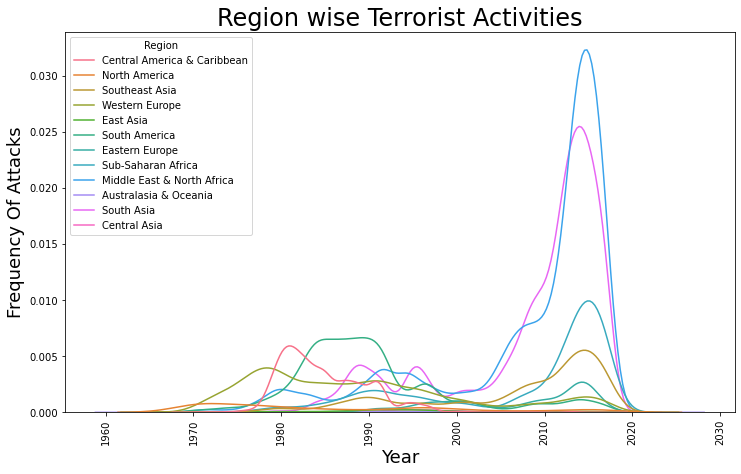

In [39]:
plt.subplots(figsize=(12,7))
sns.kdeplot(data['Year'], hue=data['Region'])
plt.title('Region wise Terrorist Activities', fontsize=24)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Frequency Of Attacks', fontsize=18)
plt.xticks(rotation = 90)
plt.show()

## From graph it is clear that ,Middle East and & North Africa as well as South Asia experience a significant rise in terrorist attacks between 2000 to 2020.

## TIMELINE: Toal killing over years.

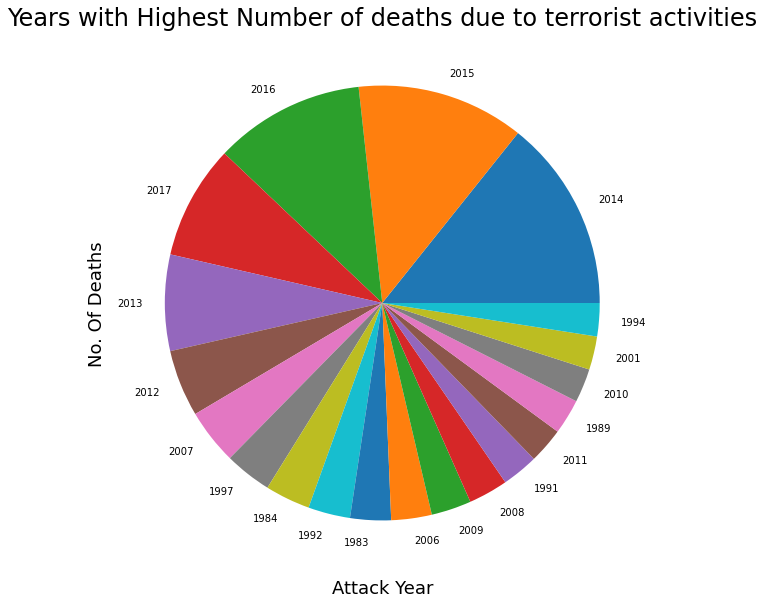

In [40]:
plt.subplots(figsize=(20,10))
data.groupby(['Year'])['Killed'].sum().sort_values(ascending = False).head(20).plot(kind = 'pie')
plt.title("Years with Highest Number of deaths due to terrorist activities", fontsize=24)
plt.xlabel('Attack Year', fontsize=18)
plt.ylabel('No. Of Deaths', fontsize=18)
plt.xticks(rotation = 90)
plt.show()

## From graph it is clear that highest no. of deaths occur in 2014.

## Countrywise number of deaths by terrorism: 

In [45]:
countryData = data.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


## Plotting total deaths of 50 countries due to terrorist attacks: 

In [46]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

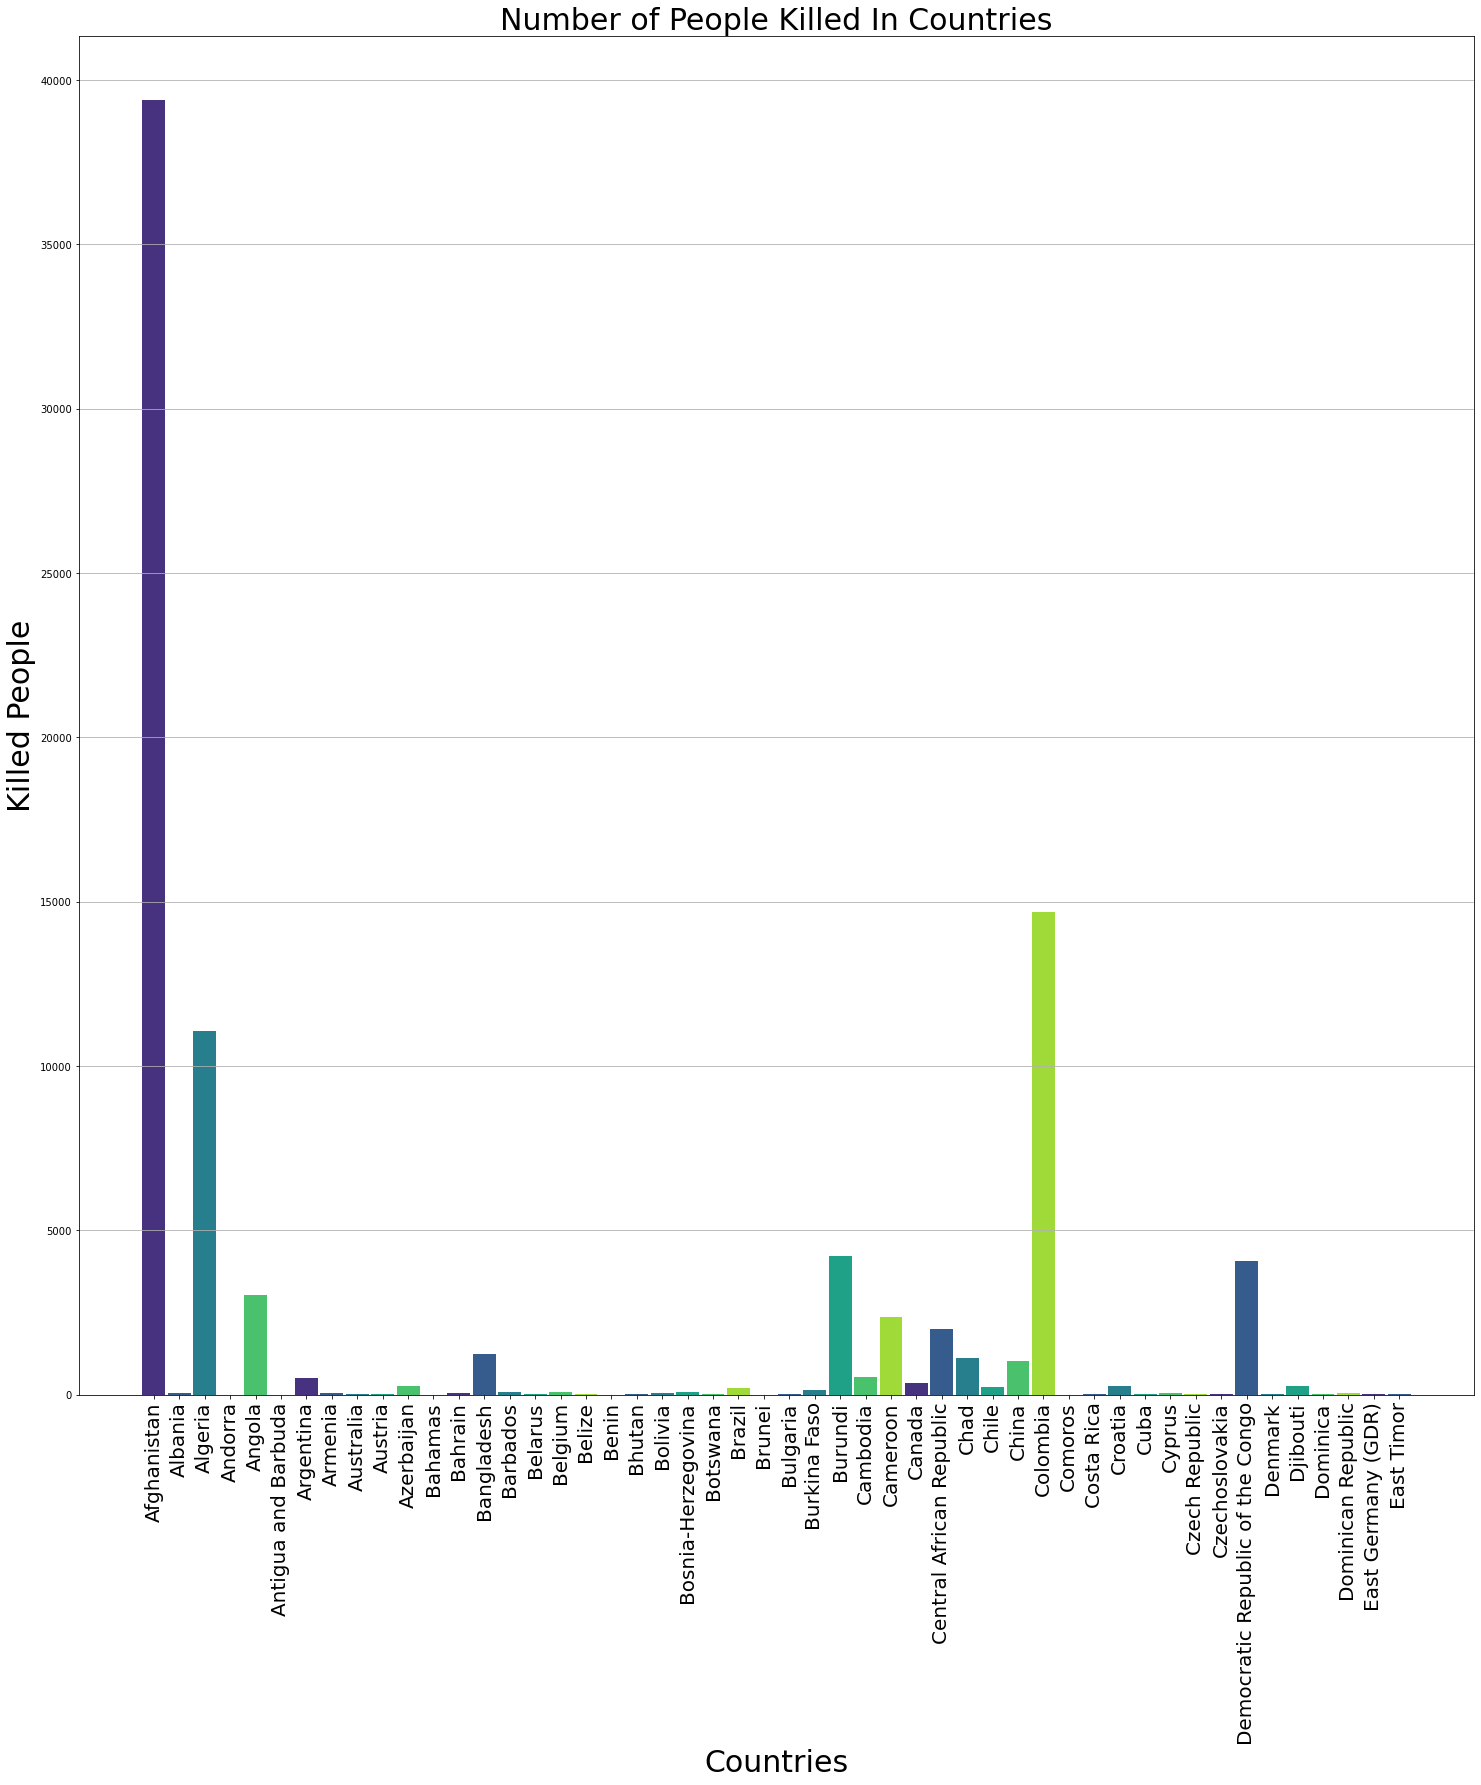

In [47]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float 
colors = sns.color_palette("viridis")
# color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=30)
plt.xlabel('Countries', fontsize = 30)
plt.xticks(index, labels, fontsize=20, rotation=90)
plt.title('Number of People Killed In Countries', fontsize = 30)
# print(fig_size)
plt.show()

## Terrorist most preferrable attack type:

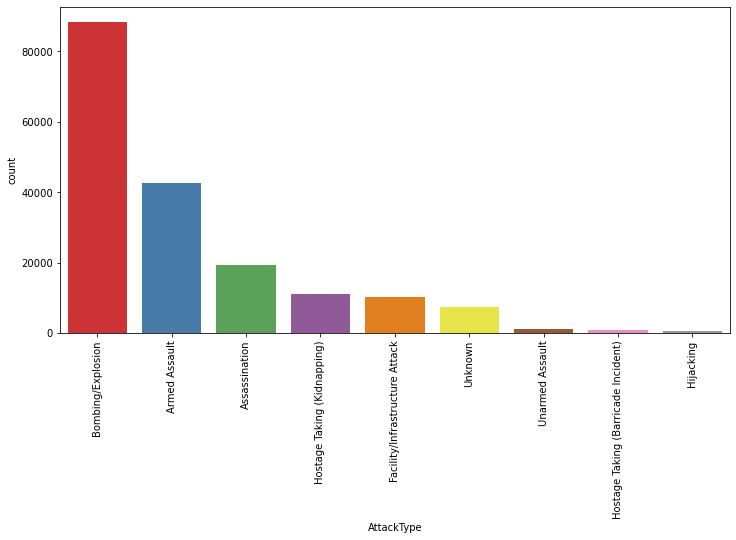

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data['AttackType'],order=data['AttackType'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that Bombing/Explosion is the most prefferable attack type of terrorists.

## Terrorist most preferrable target type : 

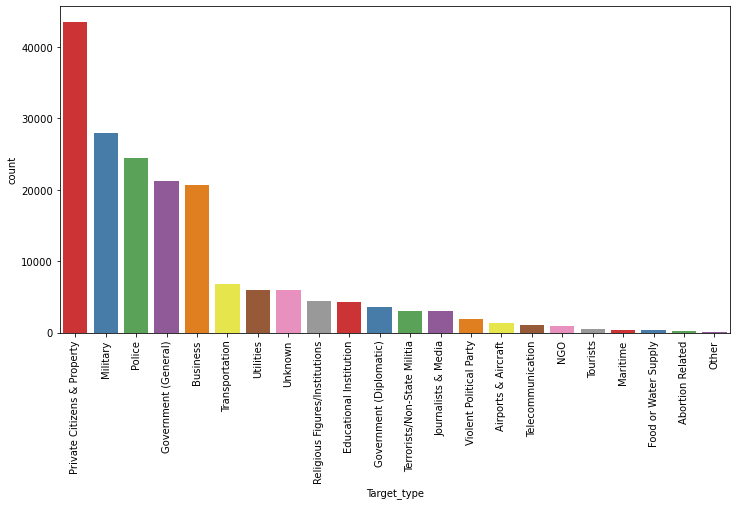

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data['Target_type'],order=data['Target_type'].value_counts().index,palette='Set1')
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that private citizens are the main targets of terrorists.

## Terrorist group with most no. of attacks: 

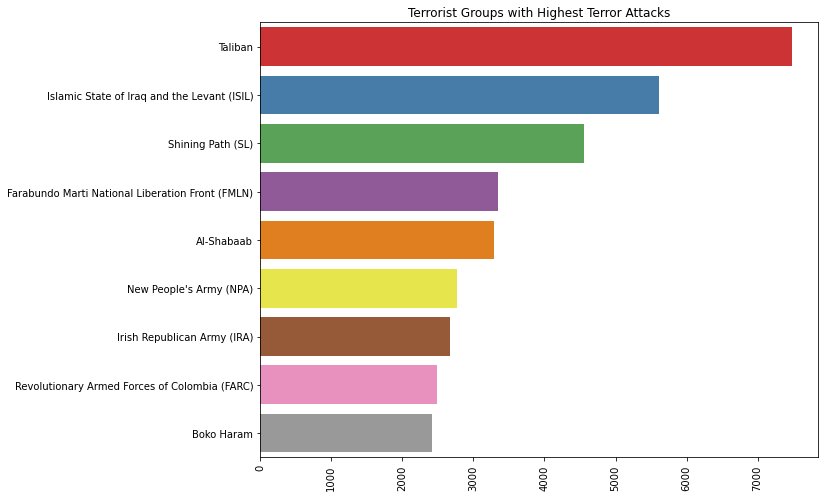

In [50]:
sns.barplot(data['Group'].value_counts()[1:10].values,data['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## From graph it is clear that Taliban is the deadliest terrorist group.

## Terrorism in India: 

In [51]:
group_country = data.groupby('Country')
india = group_country.get_group('India')

## Most affected cities of India: 

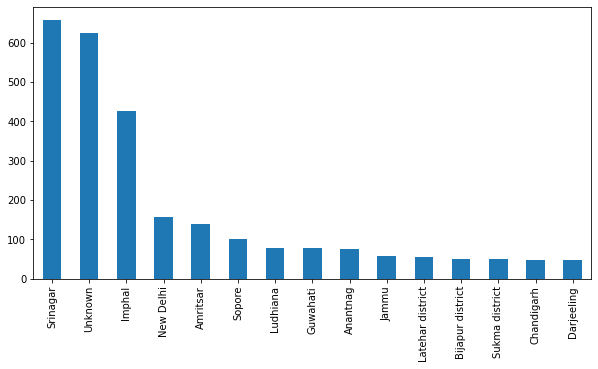

In [53]:
india['City'].value_counts().nlargest(15).plot(kind='bar', figsize=(10,5))
plt.show()

## From graph it is clear that Srinagar is the most affected city of India.

## TIMELINE: Terrorist attacks over years in India: 

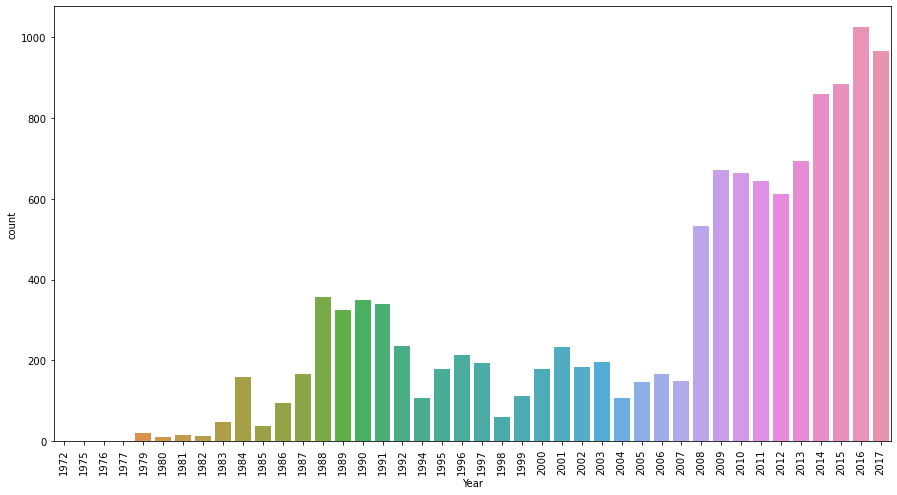

In [54]:
plt.figure(figsize=(15,8))
sns.countplot(india['Year'])
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that 2016 experience the highest no. terror attacks in India.

## Deadliest terrorist group in India: 

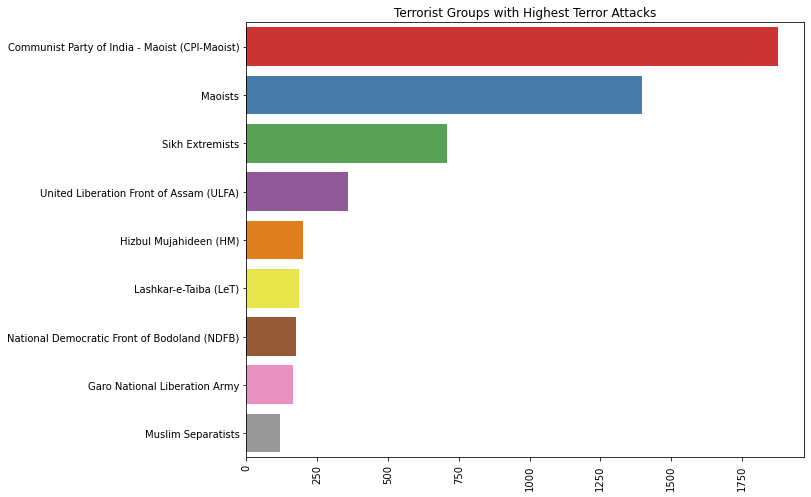

In [55]:
sns.barplot(india['Group'].value_counts()[1:10].values,india['Group'].value_counts()[1:10].index,palette='Set1')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

## From graph it is clear that CPI- Maoists had done the highest no. of attacks in India.

## TIMELINE: Killing trends over different years: 

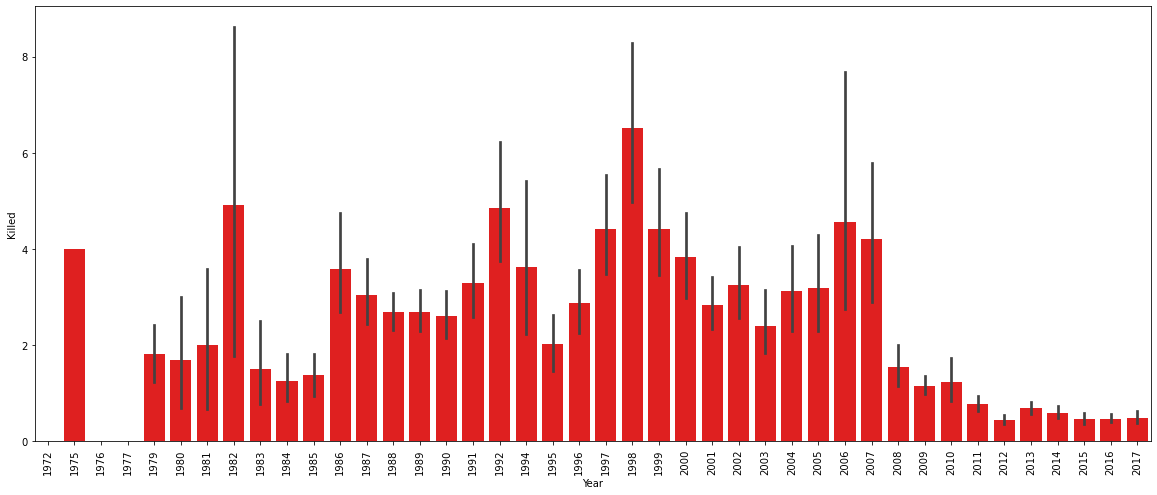

In [56]:
plt.figure(figsize=(20,8))
sns.barplot(india['Year'],india['Killed'],color='red')
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that highest no. of death occurs in 1998.

## Most preferrable type of attack in India: 

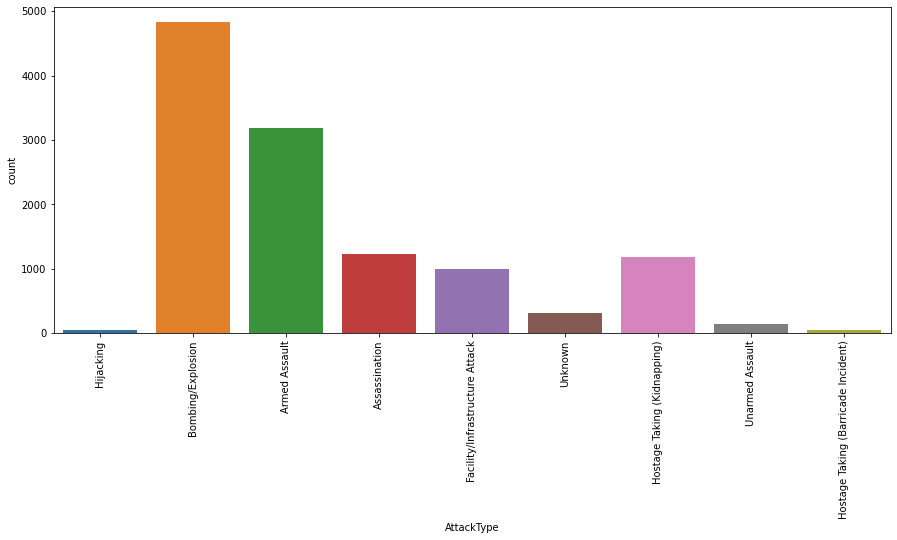

In [57]:
plt.figure(figsize=(15,6))
sns.countplot(india['AttackType'])
plt.xticks(rotation=90)
plt.show()

## From graph it is clear that terrorist use bombing/explosion to attack India.

# Conclusion: 

### 1.  Hot zones of terrorism is Middle east and North Africa so, all the countries should focus in these region.

### 2- Iraq, Afghanistan and Pakistan most suffered country, Government should be aware from the citizens of these countries.

### 3- Terrorist like to target Private citizens, Army and Police mostly, Security should be tighten in all these areas.

### 4- Government should tighten borders and should strict arms law.

### 5- All country should have to make pact to to tackle terrorism because after 2005 there is rapid increase in Terrorist Activites.